### Manish Sidhenkiwar
- +91-8600001284 - msidhenkiwar@gmail.com 

- https://www.linkedin.com/in/msid02/

# Deep Learning for Image Classification


------------

## Fashion MNIST dataset

**Lets build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

## Visualizing the Data

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

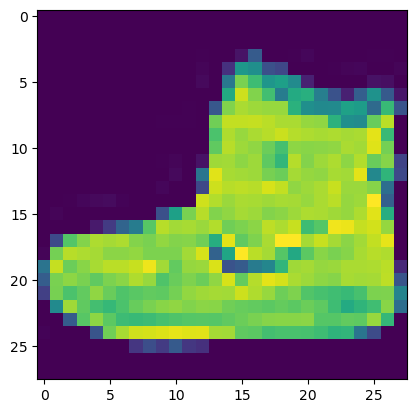

In [5]:
plt.imshow(x_train[0])

## Preprocessing the Data

In [6]:
x_train.max()

255

In [72]:
#NORMALIZE THE DATA

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train.max()

1.0

**Reshape the X arrays to include a 4 dimension of the single channel.**

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [12]:
y_train.shape

(60000,)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

In [16]:
y_cat_train.shape

(60000, 10)

## Building the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [18]:
from tensorflow.keras.optimizers import Adam

In [25]:
model = Sequential()

#convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
#flatten images
model.add(Flatten())
#dense layers
model.add(Dense(units=128,activation='relu'))
#fianl output layer
model.add(Dense(units=10,activation='softmax'))

#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

### Training the Model
**Train/Fit the model to the x_train set.**

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stops = EarlyStopping(monitor='val_loss',patience=1)

In [28]:
model.fit(x=x_train,y=y_cat_train,verbose=1,epochs=3,callbacks=[early_stops],validation_data=(x_test,y_cat_test))

Epoch 1/3
1875/1875 [==============================] - 115s 61ms/step - loss: 0.3998 - accuracy: 0.8577 - val_loss: 0.3326 - val_accuracy: 0.8802
Epoch 2/3
1875/1875 [==============================] - 114s 61ms/step - loss: 0.2761 - accuracy: 0.8998 - val_loss: 0.2879 - val_accuracy: 0.8943
Epoch 3/3
1875/1875 [==============================] - 117s 63ms/step - loss: 0.2295 - accuracy: 0.9154 - val_loss: 0.2877 - val_accuracy: 0.8962


### Evaluating the Model

In [31]:
print(model.metrics_names)

['loss', 'accuracy']


In [73]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=1))

['loss', 'accuracy']
313/313 [==============================] - 5s 15ms/step - loss: 0.2877 - accuracy: 0.8962
[0.2876821756362915, 0.8962000012397766]


In [33]:
import pandas as pd

In [34]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.399818,0.857733,0.332605,0.8802
1,0.276123,0.899800,0.287949,0.8943
2,0.229503,0.915450,0.287682,0.8962


<Axes: >

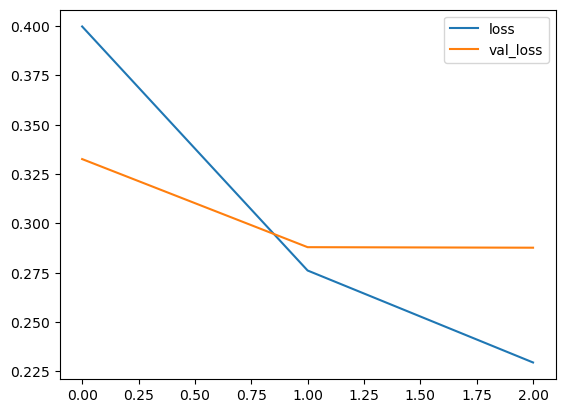

In [39]:
losses[['loss','val_loss']].plot()

In [40]:
#NEED MORE TRAINING,AS LOSSES ARE MORE.85PC ACCURACY IS NOT MUCH.

<Axes: >

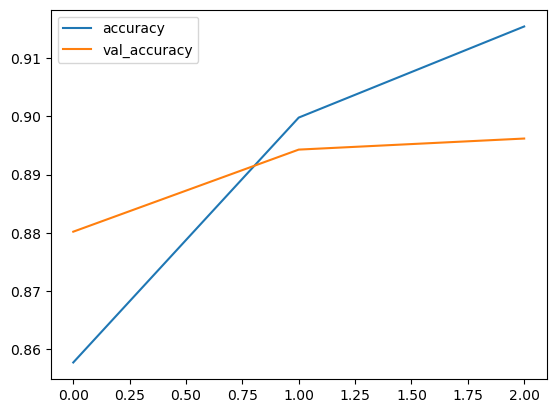

In [42]:
losses[['accuracy','val_accuracy']].plot()

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
predictions = (model.predict(x_test)>0.5).astype("int32")

313/313 [==============================] - 5s 16ms/step


In [45]:
predictions

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
#predictions max value is 1.We need to convert to (0,255) format from current(0,1) format.

In [49]:
import numpy as np

In [50]:
#convert to classes from numpy arrays of 0,1.
predictions=np.argmax(predictions,axis=1)

In [52]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78      1000
           1       1.00      0.96      0.98      1000
           2       0.79      0.89      0.84      1000
           3       0.91      0.91      0.91      1000
           4       0.86      0.79      0.82      1000
           5       0.97      0.99      0.98      1000
           6       0.86      0.53      0.66      1000
           7       0.96      0.94      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [53]:
# 89% accuracy is quite good with so liitle training.

In [54]:
confusion_matrix(y_test,predictions)

array([[931,   0,  19,   6,   2,   2,  38,   0,   2,   0],
       [ 17, 964,   0,  16,   1,   0,   2,   0,   0,   0],
       [ 49,   0, 892,   6,  37,   0,  16,   0,   0,   0],
       [ 57,   1,  12, 909,  11,   0,   8,   0,   2,   0],
       [ 40,   1, 104,  39, 791,   0,  23,   0,   2,   0],
       [  0,   0,   0,   0,   0, 986,   0,   9,   0,   5],
       [263,   0, 100,  23,  77,   0, 532,   0,   5,   0],
       [  1,   0,   0,   0,   0,  21,   0, 943,   0,  35],
       [ 23,   0,   2,   2,   1,   2,   1,   2, 967,   0],
       [  3,   0,   0,   0,   0,   6,   0,  24,   0, 967]], dtype=int64)

<Axes: >

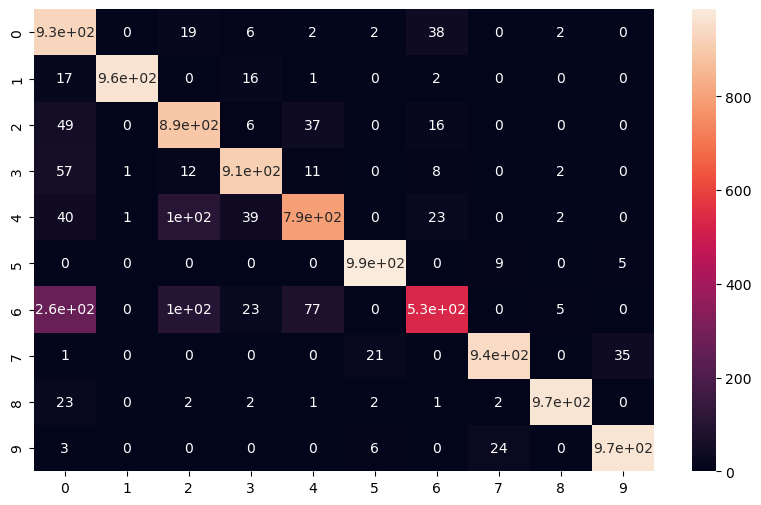

In [56]:
#lets visualize it.
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [57]:
#TEST THE MODEL

In [60]:
#let
my_image = x_test[16]

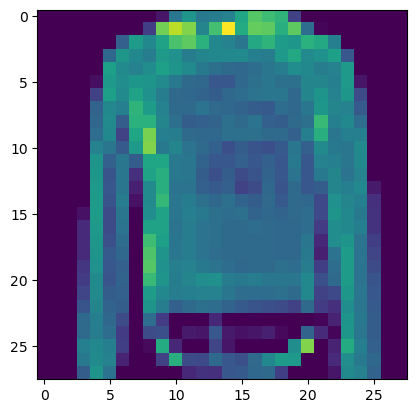

In [61]:
plt.imshow(my_image)

In [63]:
(model.predict(my_image.reshape(1,28,28,1))>0.5).astype('int32')

1/1 [==============================] - 0s 34ms/step


array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [65]:
#2 is pullover

Label	Description
0	    T-shirt/top
1	    Trouser
2	    Pullover
3	    Dress
4	    Coat
5	    Sandal
6	    Shirt
7	    Sneaker
8	    Bag
9	    Ankle boot

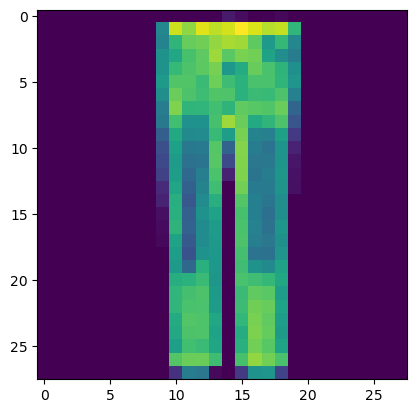

In [67]:
plt.imshow(x_test[15])

In [66]:
(model.predict(x_test[15].reshape(1,28,28,1))>0.5).astype('int32')

1/1 [==============================] - 0s 47ms/step


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# 1 is trouser.Looks like we are getting right results.

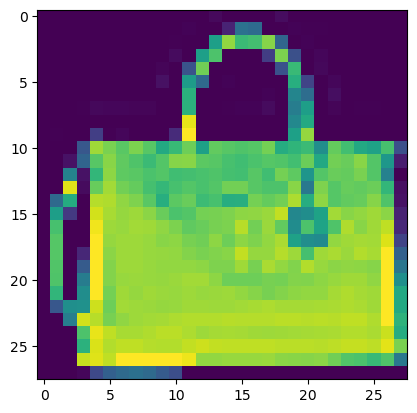

In [70]:
plt.imshow(x_test[30])

In [68]:
(model.predict(x_test[30].reshape(1,28,28,1))>0.5).astype('int32')

1/1 [==============================] - 0s 47ms/step


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [71]:
#8 is bag
#Yep,we are getting great results.

In [ ]:
Thanks!

# Thanks!